In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [4]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [6]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
[[50  2]
 [ 9 19]]
True Positives (TP): 19
False Positives (FP): 2
True Negatives (TN): 50
False Negatives (FN): 9
Accuracy: 0.86
Error Rate: 0.14
Precision: 0.90
Recall: 0.68
F1 Score: 0.78


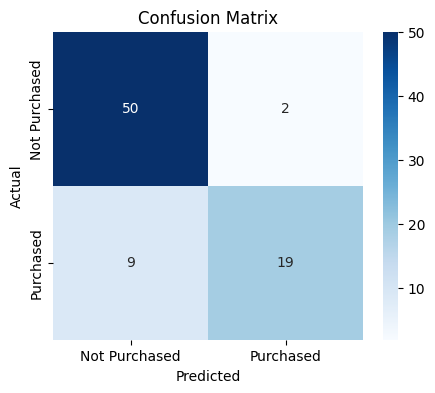

In [7]:
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

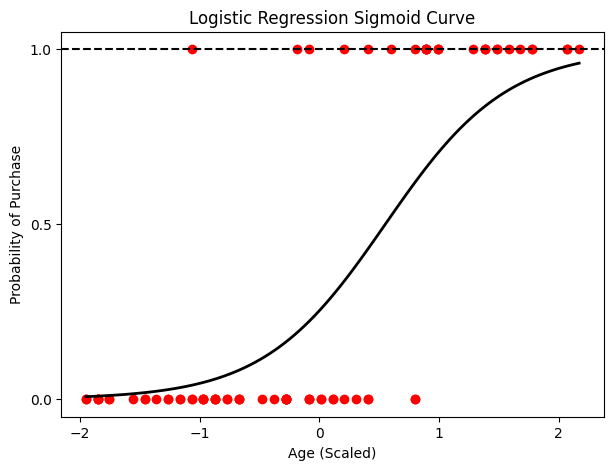

In [11]:
b0 = log_reg.intercept_[0]  
b1 = log_reg.coef_[0][0]  
b2 = log_reg.coef_[0][1]  

age_range = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
salary_mean = np.mean(X_test[:, 1])

z = b0 + b1 * age_range + b2 * salary_mean
y_prob = expit(z)

plt.figure(figsize=(7,5))
plt.plot(age_range, y_prob, color='black', linewidth=2)
plt.scatter(X_test[:, 0], y_test, color='red')

plt.xlabel('Age (Scaled)')
plt.ylabel('Probability of Purchase')
plt.title('Logistic Regression Sigmoid Curve')

plt.yticks([0, 0.5, 1])
plt.axhline(y=1, color='black', linestyle='dashed')

plt.show()